In [1]:
import json

# Data for different sequence lengths
performance_data = {
    "20": {"CCAL_R2": 0.711, "HCAL_R2": 0.779, "Overall_R2": 0.745},
    "30": {"CCAL_R2": 0.816, "HCAL_R2": 0.799, "Overall_R2": 0.807},
    "40": {"CCAL_R2": 0.814, "HCAL_R2": 0.811, "Overall_R2": 0.812},
    "50": {"CCAL_R2": 0.781, "HCAL_R2": 0.795, "Overall_R2": 0.788},
    "60": {"CCAL_R2": 0.795, "HCAL_R2": 0.787, "Overall_R2": 0.791},
    "70": {"CCAL_R2": 0.757, "HCAL_R2": 0.778, "Overall_R2": 0.768}
}

# Save to JSON file
with open("sequence_performance.json", "w") as f:
    json.dump(performance_data, f, indent=4)


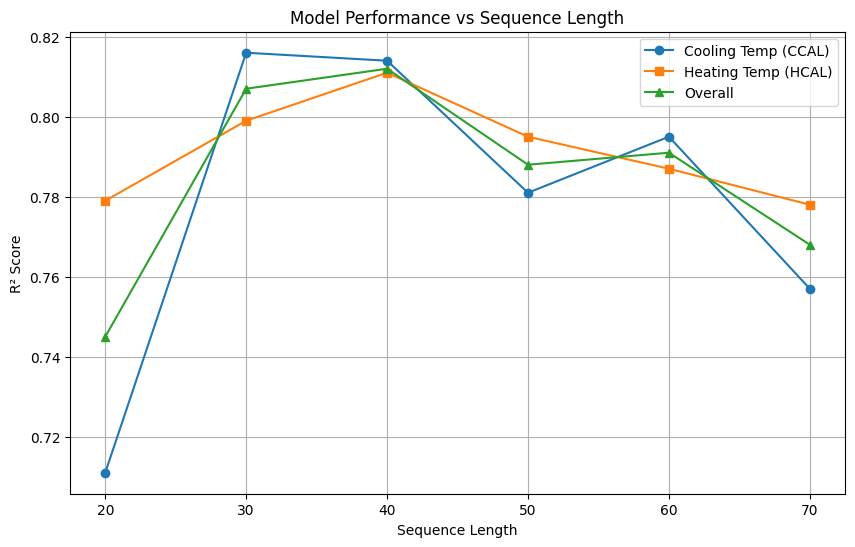

In [2]:
import json
import matplotlib.pyplot as plt

# Load JSON
with open("sequence_performance.json", "r") as f:
    data = json.load(f)

# Extract values
seq_lengths = sorted([int(k) for k in data.keys()])
ccal_r2 = [data[str(seq)]["CCAL_R2"] for seq in seq_lengths]
hcal_r2 = [data[str(seq)]["HCAL_R2"] for seq in seq_lengths]
overall_r2 = [data[str(seq)]["Overall_R2"] for seq in seq_lengths]

# Plot
plt.figure(figsize=(10,6))
plt.plot(seq_lengths, ccal_r2, marker='o', label='Cooling Temp (CCAL)')
plt.plot(seq_lengths, hcal_r2, marker='s', label='Heating Temp (HCAL)')
plt.plot(seq_lengths, overall_r2, marker='^', label='Overall')
plt.title('Model Performance vs Sequence Length')
plt.xlabel('Sequence Length')
plt.ylabel('R² Score')
plt.xticks(seq_lengths)
plt.grid(True)
plt.legend()
plt.show()


In [3]:
import json

# Only overall R² for each sequence length
overall_r2_data = {
    "20": 0.745,
    "30": 0.807,
    "40": 0.812,
    "50": 0.788,
    "60": 0.791,
    "70": 0.768
}

# Save to JSON file
with open("overall_r2.json", "w") as f:
    json.dump(overall_r2_data, f, indent=4)


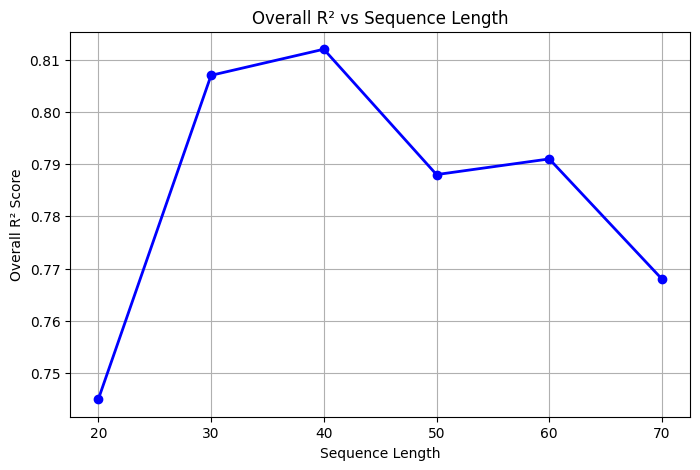

In [4]:
import json
import matplotlib.pyplot as plt

# Load JSON
with open("overall_r2.json", "r") as f:
    data = json.load(f)

# Extract sequence lengths and values
seq_lengths = sorted([int(k) for k in data.keys()])
overall_r2 = [data[str(seq)] for seq in seq_lengths]

# Plot
plt.figure(figsize=(8,5))
plt.plot(seq_lengths, overall_r2, marker='o', color='blue', linewidth=2)
plt.title('Overall R² vs Sequence Length')
plt.xlabel('Sequence Length')
plt.ylabel('Overall R² Score')
plt.xticks(seq_lengths)
plt.grid(True)
plt.show()


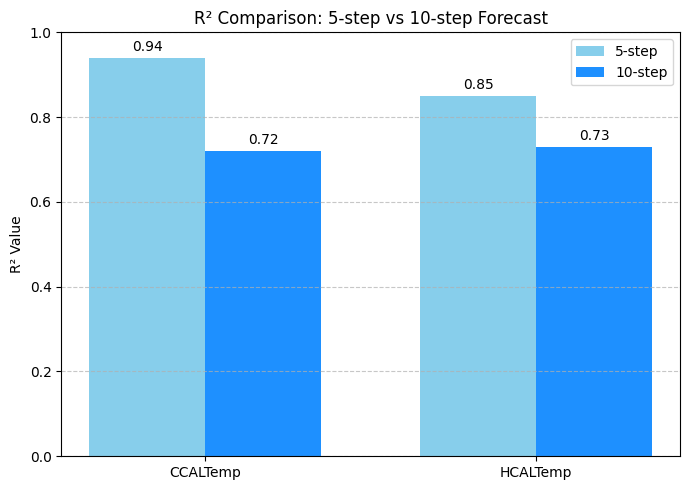

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# R² values
r2_5 = {"CCALTemp": 0.94, "HCALTemp": 0.85}
r2_10 = {"CCALTemp": 0.72, "HCALTemp": 0.73}

labels = ["CCALTemp", "HCALTemp"]
r2_5_values = [r2_5[l] for l in labels]
r2_10_values = [r2_10[l] for l in labels]

x = np.arange(len(labels))  # label locations
width = 0.35  # width of bars

fig, ax = plt.subplots(figsize=(7,5))
rects1 = ax.bar(x - width/2, r2_5_values, width, label='5-step', color='skyblue')
rects2 = ax.bar(x + width/2, r2_10_values, width, label='10-step', color='dodgerblue')

# Labels & title
ax.set_ylabel('R² Value')
ax.set_title('R² Comparison: 5-step vs 10-step Forecast')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0,1)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display values on bars
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()
